In [35]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder , StandardScaler
from decimal import Decimal
from re import sub
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from pandas import DataFrame

import seaborn as sns

In [2]:
#Importing the data set 
datasetTrain = pd.read_csv('/home/achraf/Bureau/faurecia/train_auto.csv')

In [3]:
datasetTrain['TARGET_FLAG'].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

In [4]:
datasetTrain['KIDSDRIV'].value_counts()

0    7180
1     636
2     279
3      62
4       4
Name: KIDSDRIV, dtype: int64

In [5]:
datasetTrain['JOB'].value_counts()

z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64

In [6]:
datasetTrain['URBANICITY'].value_counts()

Highly Urban/ Urban      6492
z_Highly Rural/ Rural    1669
Name: URBANICITY, dtype: int64

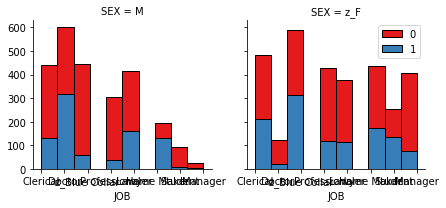

In [7]:
g = sns.FacetGrid(datasetTrain, col="SEX", hue="TARGET_FLAG", palette="Set1", col_wrap=5)
g.map(plt.hist, 'JOB', ec="k")

g.axes[-1].legend()
plt.show()

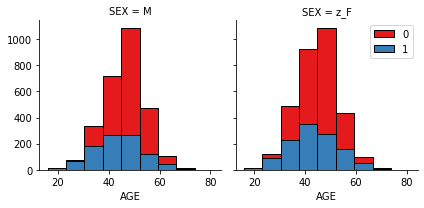

In [8]:
import seaborn as sns

bins = np.linspace(datasetTrain.AGE.min(), datasetTrain.AGE.max(), 10)
g = sns.FacetGrid(datasetTrain, col="SEX", hue="TARGET_FLAG", palette="Set1", col_wrap=2)
g.map(plt.hist, 'AGE', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [9]:
# Encode categorical data and scale continuous data
filtredDataset = datasetTrain[(datasetTrain.CAR_AGE >= 0)].dropna()
del filtredDataset['RED_CAR']
del filtredDataset['JOB']
del filtredDataset['EDUCATION']

filtredDataset['INCOME'] = filtredDataset['INCOME'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['HOME_VAL'] = filtredDataset['HOME_VAL'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['BLUEBOOK'] = filtredDataset['BLUEBOOK'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))
filtredDataset['OLDCLAIM'] = filtredDataset['OLDCLAIM'].transform(lambda x : Decimal(sub(r'[^\d.]', '' , x)))

x = filtredDataset.iloc[: , 3:24].values
y = filtredDataset.iloc[: , 1].values


carType = LabelEncoder()
x[: , 13] = carType.fit_transform(x[: , 13])

parent1 = LabelEncoder()
x[: , 5] = parent1.fit_transform(x[: , 5])

mstatus = LabelEncoder()
x[: , 7] = mstatus.fit_transform(x[: , 7])

sex = LabelEncoder()
x[: , 8] = sex.fit_transform(x[: , 8])

carUse = LabelEncoder()
x[: , 10] = carUse.fit_transform(x[: , 10])

revoked = LabelEncoder()
x[: , 16] = revoked.fit_transform(x[: , 16])

urbanicity = LabelEncoder()
x[: , 19] = urbanicity.fit_transform(x[: , 19])

oneHotEncoder = OneHotEncoder(categorical_features=[13])

x = oneHotEncoder.fit_transform(x).toarray()
x = np.delete(x , 0 , 1)

/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [10]:
# Split in train/test
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


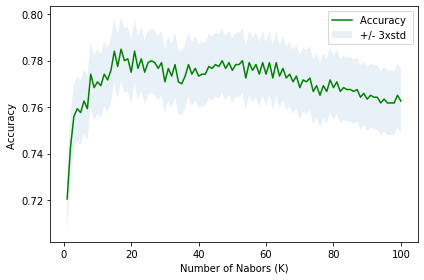

In [17]:
# Fitting the KNN to the Training set
mean_acc=np.zeros(100)
std_acc = np.zeros(100)
for n in range(1,101):
    knnmodel=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    # Predicting the Test set results
    y_pred_knn=knnmodel.predict(X_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test,y_pred_knn)
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred_knn.shape[0])
    
plt.plot(range(1,101),mean_acc,'g')
plt.fill_between(range(1,101),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [15]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7849462365591398 with k= 17


In [16]:
# Fitting the Decision tree to the Training set
dtmodel = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dtmodel.fit(X_train,y_train)
# Predicting the Test set results
y_pred_dt=dtmodel.predict(X_test)

TreeAccuracy=metrics.accuracy_score(y_test,y_pred_dt)
print( "The accuracy of decision tree was", TreeAccuracy)

The accuracy of decision tree was 0.7526881720430108


In [15]:
# Fitting the SVM to the Training set
svmmodel=svm.SVC(kernel='rbf')
svmmodel.fit(X_train,y_train)
# Predicting the Test set results
y_pred_svm=svmmodel.predict(X_test)
print( "The accuracy of SVM was ",metrics.accuracy_score(y_test,y_pred_svm))

The accuracy of SVM was  0.794044665012407


In [11]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 25, epochs = 500)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/500





4835/4835 [==============================] - 3s 576us/step - loss: 0.6413 - acc: 0.7324
Epoch 2/500
4835/4835 [==============================] - 0s 102us/step - loss: 0.4872 - acc: 0.7744
Epoch 3/500
4835/4835 [==============================] - 0s 101us/step - loss: 0.4591 - acc: 0.7868
Epoch 4/500
4835/4835 [==============================] - 0s 102us/step - loss: 0.4524 - acc: 0.7903
Epoch 5/500
4835/4835 [==============================] - 0s 96us/step - loss: 0.4493 - acc: 0.7921
Epoch 6/500
4835/4835 [==============================] - 1s 108us/step - loss: 0.4470 - acc: 0.7928
Epoch 7/500
4835/4835 [==============================] - 0s 97us/step - loss: 0.4455 - acc: 0.7919
Epoch 8/500
4835/4835 [==============================] - 0s 101us/step - loss: 0.4441 - acc: 0.7892
Epoch 9/500
4835/4835 [==============================] - 0s 100us/step - loss: 0.4427 - acc: 0.

4835/4835 [==============================] - 0s 93us/step - loss: 0.4104 - acc: 0.8097
Epoch 54/500
4835/4835 [==============================] - 1s 120us/step - loss: 0.4111 - acc: 0.8085
Epoch 55/500
4835/4835 [==============================] - 1s 118us/step - loss: 0.4096 - acc: 0.8077
Epoch 56/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.4100 - acc: 0.8081
Epoch 57/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.4091 - acc: 0.8079
Epoch 58/500
4835/4835 [==============================] - 0s 92us/step - loss: 0.4090 - acc: 0.8089
Epoch 59/500
4835/4835 [==============================] - 0s 92us/step - loss: 0.4083 - acc: 0.8101
Epoch 60/500
4835/4835 [==============================] - 1s 112us/step - loss: 0.4078 - acc: 0.8105
Epoch 61/500
4835/4835 [==============================] - 0s 100us/step - loss: 0.4079 - acc: 0.8108
Epoch 62/500
4835/4835 [==============================] - 1s 111us/step - loss: 0.4073 - acc: 0.8093
Epoch 63

Epoch 134/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.3895 - acc: 0.8199
Epoch 135/500
4835/4835 [==============================] - 0s 94us/step - loss: 0.3892 - acc: 0.8186
Epoch 136/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3892 - acc: 0.8207
Epoch 137/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3896 - acc: 0.8199
Epoch 138/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3889 - acc: 0.8194
Epoch 139/500
4835/4835 [==============================] - 0s 87us/step - loss: 0.3890 - acc: 0.8163
Epoch 140/500
4835/4835 [==============================] - 0s 93us/step - loss: 0.3882 - acc: 0.8201
Epoch 141/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.3880 - acc: 0.8165
Epoch 142/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3887 - acc: 0.8209
Epoch 143/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.3893 - ac

Epoch 215/500
4835/4835 [==============================] - 1s 139us/step - loss: 0.3747 - acc: 0.8259
Epoch 216/500
4835/4835 [==============================] - 1s 124us/step - loss: 0.3739 - acc: 0.8287
Epoch 217/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3740 - acc: 0.8273
Epoch 218/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3739 - acc: 0.8252
Epoch 219/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3742 - acc: 0.8250
Epoch 220/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3735 - acc: 0.8254
Epoch 221/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.3738 - acc: 0.8228
Epoch 222/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3732 - acc: 0.8223
Epoch 223/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3731 - acc: 0.8267
Epoch 224/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3733 - 

4835/4835 [==============================] - 0s 90us/step - loss: 0.3660 - acc: 0.8273
Epoch 297/500
4835/4835 [==============================] - 0s 93us/step - loss: 0.3658 - acc: 0.8267
Epoch 298/500
4835/4835 [==============================] - 1s 103us/step - loss: 0.3659 - acc: 0.8244
Epoch 299/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3659 - acc: 0.8256
Epoch 300/500
4835/4835 [==============================] - 0s 94us/step - loss: 0.3654 - acc: 0.8265
Epoch 301/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3649 - acc: 0.8256
Epoch 302/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3652 - acc: 0.8271
Epoch 303/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3661 - acc: 0.8273
Epoch 304/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3658 - acc: 0.8275
Epoch 305/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3650 - acc: 0.8267
Epo

4835/4835 [==============================] - 0s 90us/step - loss: 0.3607 - acc: 0.8314
Epoch 378/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3604 - acc: 0.8312
Epoch 379/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3605 - acc: 0.8333
Epoch 380/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3613 - acc: 0.8316
Epoch 381/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3597 - acc: 0.8310
Epoch 382/500
4835/4835 [==============================] - 0s 87us/step - loss: 0.3607 - acc: 0.8331
Epoch 383/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3596 - acc: 0.8310
Epoch 384/500
4835/4835 [==============================] - 0s 85us/step - loss: 0.3607 - acc: 0.8300
Epoch 385/500
4835/4835 [==============================] - 0s 91us/step - loss: 0.3606 - acc: 0.8312
Epoch 386/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3604 - acc: 0.8323
Epoc

4835/4835 [==============================] - 0s 92us/step - loss: 0.3568 - acc: 0.8343
Epoch 459/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3570 - acc: 0.8331
Epoch 460/500
4835/4835 [==============================] - 1s 121us/step - loss: 0.3560 - acc: 0.8339
Epoch 461/500
4835/4835 [==============================] - 0s 99us/step - loss: 0.3574 - acc: 0.8356
Epoch 462/500
4835/4835 [==============================] - 0s 90us/step - loss: 0.3564 - acc: 0.8335
Epoch 463/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3575 - acc: 0.8360
Epoch 464/500
4835/4835 [==============================] - 0s 93us/step - loss: 0.3563 - acc: 0.8323
Epoch 465/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3569 - acc: 0.8370
Epoch 466/500
4835/4835 [==============================] - 0s 89us/step - loss: 0.3572 - acc: 0.8364
Epoch 467/500
4835/4835 [==============================] - 0s 88us/step - loss: 0.3570 - acc: 0.8345
Epo

In [19]:
# Predicting the Test set results
y_pred_ann = classifier.predict(X_test)
for i in range(len(y_pred_ann)):
    if y_pred_ann[i, 0] > 0.5:
        y_pred_ann[i, 0] = 1
    else: 
        y_pred_ann[i, 0] = 0

print( "The accuracy of ANN was", metrics.accuracy_score(y_test,y_pred_ann))

The accuracy of ANN was 0.7692307692307693


In [16]:
# Tune
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 13, kernel_initializer = 'uniform', activation = 'relu', input_dim = 24))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 32],
              'epochs': [80, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


Epoch 1/80
4351/4351 [==============================] - 1s 187us/step - loss: 0.5866 - acc: 0.7311
Epoch 2/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4743 - acc: 0.7320
Epoch 3/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4640 - acc: 0.7320
Epoch 4/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4589 - acc: 0.7538
Epoch 5/80
4351/4351 [==============================] - 0s 56us/step - loss: 0.4556 - acc: 0.7886
Epoch 6/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4524 - acc: 0.7902
Epoch 7/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4499 - acc: 0.7971
Epoch 8/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4475 - acc: 0.7948
Epoch 9/80
4351/4351 [==============================] - 0s 74us/step - loss: 0.4457 - acc: 0.7975
Epoch 10/80
4351/4351 [==============================] - 0s 67us/step - loss: 0.4435 - acc: 0.7925
Epoch 11/80
4351/4

Epoch 6/80
4351/4351 [==============================] - 0s 66us/step - loss: 0.4571 - acc: 0.7771
Epoch 7/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4548 - acc: 0.7823
Epoch 8/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4524 - acc: 0.7886
Epoch 9/80
4351/4351 [==============================] - 0s 67us/step - loss: 0.4506 - acc: 0.7927
Epoch 10/80
4351/4351 [==============================] - 0s 60us/step - loss: 0.4490 - acc: 0.7938
Epoch 11/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4475 - acc: 0.7964
Epoch 12/80
4351/4351 [==============================] - 0s 60us/step - loss: 0.4463 - acc: 0.7945
Epoch 13/80
4351/4351 [==============================] - 0s 72us/step - loss: 0.4446 - acc: 0.7929
Epoch 14/80
4351/4351 [==============================] - 0s 63us/step - loss: 0.4435 - acc: 0.7973
Epoch 15/80
4351/4351 [==============================] - 0s 70us/step - loss: 0.4424 - acc: 0.7961
Epoch 16/80
43

Epoch 11/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4433 - acc: 0.7922
Epoch 12/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4418 - acc: 0.7932
Epoch 13/80
4351/4351 [==============================] - 0s 56us/step - loss: 0.4404 - acc: 0.7950
Epoch 14/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4396 - acc: 0.7968
Epoch 15/80
4351/4351 [==============================] - 0s 55us/step - loss: 0.4372 - acc: 0.7980
Epoch 16/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4368 - acc: 0.7977
Epoch 17/80
4351/4351 [==============================] - 0s 71us/step - loss: 0.4355 - acc: 0.7987
Epoch 18/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4347 - acc: 0.7989
Epoch 19/80
4351/4351 [==============================] - 0s 59us/step - loss: 0.4333 - acc: 0.7984
Epoch 20/80
4351/4351 [==============================] - 0s 57us/step - loss: 0.4327 - acc: 0.7987
Epoch 21/8

Epoch 16/80
4352/4352 [==============================] - 0s 60us/step - loss: 0.4376 - acc: 0.7911
Epoch 17/80
4352/4352 [==============================] - 0s 57us/step - loss: 0.4368 - acc: 0.7946
Epoch 18/80
4352/4352 [==============================] - 0s 58us/step - loss: 0.4351 - acc: 0.7960
Epoch 19/80
4352/4352 [==============================] - 0s 60us/step - loss: 0.4344 - acc: 0.7971
Epoch 20/80
4352/4352 [==============================] - 0s 58us/step - loss: 0.4336 - acc: 0.7943
Epoch 21/80
4352/4352 [==============================] - 0s 61us/step - loss: 0.4322 - acc: 0.7973
Epoch 22/80
4352/4352 [==============================] - 0s 58us/step - loss: 0.4312 - acc: 0.7971
Epoch 23/80
4352/4352 [==============================] - 0s 58us/step - loss: 0.4310 - acc: 0.7960
Epoch 24/80
4352/4352 [==============================] - 0s 57us/step - loss: 0.4292 - acc: 0.7948
Epoch 25/80
4352/4352 [==============================] - 0s 57us/step - loss: 0.4291 - acc: 0.7996
Epoch 26/8

Epoch 21/80
4352/4352 [==============================] - 0s 59us/step - loss: 0.4290 - acc: 0.8028
Epoch 22/80
4352/4352 [==============================] - 0s 63us/step - loss: 0.4271 - acc: 0.8040
Epoch 23/80
4352/4352 [==============================] - 0s 61us/step - loss: 0.4263 - acc: 0.8051
Epoch 24/80
4352/4352 [==============================] - 0s 62us/step - loss: 0.4252 - acc: 0.8012
Epoch 25/80
4352/4352 [==============================] - 0s 59us/step - loss: 0.4239 - acc: 0.8056
Epoch 26/80
4352/4352 [==============================] - 0s 58us/step - loss: 0.4225 - acc: 0.8045
Epoch 27/80
4352/4352 [==============================] - 0s 62us/step - loss: 0.4217 - acc: 0.8077
Epoch 28/80
4352/4352 [==============================] - 0s 61us/step - loss: 0.4205 - acc: 0.8074
Epoch 29/80
4352/4352 [==============================] - 0s 61us/step - loss: 0.4197 - acc: 0.8056
Epoch 30/80
4352/4352 [==============================] - 0s 63us/step - loss: 0.4184 - acc: 0.8058
Epoch 31/8

Epoch 26/80
4351/4351 [==============================] - 0s 60us/step - loss: 0.4276 - acc: 0.8021
Epoch 27/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4271 - acc: 0.8000
Epoch 28/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4263 - acc: 0.8037
Epoch 29/80
4351/4351 [==============================] - 0s 59us/step - loss: 0.4256 - acc: 0.8037
Epoch 30/80
4351/4351 [==============================] - 0s 64us/step - loss: 0.4257 - acc: 0.8033
Epoch 31/80
4351/4351 [==============================] - 0s 58us/step - loss: 0.4246 - acc: 0.8028
Epoch 32/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4244 - acc: 0.7998
Epoch 33/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4237 - acc: 0.8046
Epoch 34/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4233 - acc: 0.8053
Epoch 35/80
4351/4351 [==============================] - 0s 59us/step - loss: 0.4229 - acc: 0.8030
Epoch 36/8

Epoch 31/80
4351/4351 [==============================] - 0s 60us/step - loss: 0.4287 - acc: 0.7996
Epoch 32/80
4351/4351 [==============================] - 0s 67us/step - loss: 0.4280 - acc: 0.8019
Epoch 33/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4272 - acc: 0.7998
Epoch 34/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4273 - acc: 0.8040
Epoch 35/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4263 - acc: 0.7984
Epoch 36/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4255 - acc: 0.8021
Epoch 37/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4243 - acc: 0.8037
Epoch 38/80
4351/4351 [==============================] - 0s 60us/step - loss: 0.4242 - acc: 0.8058
Epoch 39/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4236 - acc: 0.8028
Epoch 40/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4230 - acc: 0.8044
Epoch 41/8

Epoch 36/80
4351/4351 [==============================] - 0s 63us/step - loss: 0.4175 - acc: 0.8042
Epoch 37/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4171 - acc: 0.8051
Epoch 38/80
4351/4351 [==============================] - 0s 65us/step - loss: 0.4157 - acc: 0.8046
Epoch 39/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4158 - acc: 0.8056
Epoch 40/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4143 - acc: 0.8069
Epoch 41/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4139 - acc: 0.8035
Epoch 42/80
4351/4351 [==============================] - 0s 63us/step - loss: 0.4136 - acc: 0.8074
Epoch 43/80
4351/4351 [==============================] - 0s 63us/step - loss: 0.4136 - acc: 0.8081
Epoch 44/80
4351/4351 [==============================] - 0s 63us/step - loss: 0.4125 - acc: 0.8053
Epoch 45/80
4351/4351 [==============================] - 0s 62us/step - loss: 0.4118 - acc: 0.8076
Epoch 46/8

Epoch 41/80
4352/4352 [==============================] - 0s 63us/step - loss: 0.4226 - acc: 0.8047
Epoch 42/80
4352/4352 [==============================] - 0s 60us/step - loss: 0.4221 - acc: 0.8077
Epoch 43/80
4352/4352 [==============================] - 0s 63us/step - loss: 0.4207 - acc: 0.8054
Epoch 44/80
4352/4352 [==============================] - 0s 68us/step - loss: 0.4203 - acc: 0.8072
Epoch 45/80
4352/4352 [==============================] - 0s 69us/step - loss: 0.4199 - acc: 0.8056
Epoch 46/80
4352/4352 [==============================] - 0s 75us/step - loss: 0.4190 - acc: 0.8086
Epoch 47/80
4352/4352 [==============================] - 0s 70us/step - loss: 0.4185 - acc: 0.8097
Epoch 48/80
4352/4352 [==============================] - 0s 75us/step - loss: 0.4181 - acc: 0.8054
Epoch 49/80
4352/4352 [==============================] - 0s 68us/step - loss: 0.4173 - acc: 0.8130
Epoch 50/80
4352/4352 [==============================] - 0s 78us/step - loss: 0.4168 - acc: 0.8091
Epoch 51/8

Epoch 46/80
4352/4352 [==============================] - 0s 47us/step - loss: 0.4153 - acc: 0.8070
Epoch 47/80
4352/4352 [==============================] - 0s 49us/step - loss: 0.4149 - acc: 0.8114
Epoch 48/80
4352/4352 [==============================] - 0s 53us/step - loss: 0.4151 - acc: 0.8084
Epoch 49/80
4352/4352 [==============================] - 0s 49us/step - loss: 0.4145 - acc: 0.8114
Epoch 50/80
4352/4352 [==============================] - 0s 49us/step - loss: 0.4143 - acc: 0.8125
Epoch 51/80
4352/4352 [==============================] - 0s 49us/step - loss: 0.4141 - acc: 0.8111
Epoch 52/80
4352/4352 [==============================] - 0s 53us/step - loss: 0.4130 - acc: 0.8109
Epoch 53/80
4352/4352 [==============================] - 0s 50us/step - loss: 0.4130 - acc: 0.8125
Epoch 54/80
4352/4352 [==============================] - 0s 51us/step - loss: 0.4131 - acc: 0.8127
Epoch 55/80
4352/4352 [==============================] - 0s 49us/step - loss: 0.4125 - acc: 0.8141
Epoch 56/8

4351/4351 [==============================] - 0s 57us/step - loss: 0.4056 - acc: 0.8076
Epoch 51/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4047 - acc: 0.8076
Epoch 52/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4040 - acc: 0.8115
Epoch 53/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4034 - acc: 0.8079
Epoch 54/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4031 - acc: 0.8085
Epoch 55/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4030 - acc: 0.8095
Epoch 56/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4020 - acc: 0.8083
Epoch 57/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4016 - acc: 0.8072
Epoch 58/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4008 - acc: 0.8079
Epoch 59/120
4351/4351 [==============================] - 0s 57us/step - loss: 0.4008 - acc: 0.8085
Epoch 60/120


4351/4351 [==============================] - 0s 52us/step - loss: 0.3956 - acc: 0.8136
Epoch 94/120
4351/4351 [==============================] - 0s 53us/step - loss: 0.3968 - acc: 0.8134
Epoch 95/120
4351/4351 [==============================] - 0s 62us/step - loss: 0.3971 - acc: 0.8157
Epoch 96/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3966 - acc: 0.8152
Epoch 97/120
4351/4351 [==============================] - 0s 52us/step - loss: 0.3966 - acc: 0.8131
Epoch 98/120
4351/4351 [==============================] - 0s 53us/step - loss: 0.3961 - acc: 0.8141
Epoch 99/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3964 - acc: 0.8166
Epoch 100/120
4351/4351 [==============================] - 0s 53us/step - loss: 0.3955 - acc: 0.8166
Epoch 101/120
4351/4351 [==============================] - 0s 53us/step - loss: 0.3968 - acc: 0.8180
Epoch 102/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3957 - acc: 0.8152
Epoch 103/

4351/4351 [==============================] - 0s 57us/step - loss: 0.4328 - acc: 0.7973
Epoch 16/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.4315 - acc: 0.7989
Epoch 17/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4305 - acc: 0.7980
Epoch 18/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4291 - acc: 0.7991
Epoch 19/120
4351/4351 [==============================] - 0s 57us/step - loss: 0.4279 - acc: 0.7984
Epoch 20/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4281 - acc: 0.8005
Epoch 21/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4277 - acc: 0.8026
Epoch 22/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4260 - acc: 0.8012
Epoch 23/120
4351/4351 [==============================] - 0s 57us/step - loss: 0.4263 - acc: 0.7968
Epoch 24/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.4255 - acc: 0.8026
Epoch 25/120


4351/4351 [==============================] - 0s 57us/step - loss: 0.3988 - acc: 0.8187
Epoch 98/120
4351/4351 [==============================] - 0s 54us/step - loss: 0.3983 - acc: 0.8184
Epoch 99/120
4351/4351 [==============================] - 0s 56us/step - loss: 0.4002 - acc: 0.8129
Epoch 100/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3987 - acc: 0.8177
Epoch 101/120
4351/4351 [==============================] - 0s 56us/step - loss: 0.3987 - acc: 0.8154
Epoch 102/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3977 - acc: 0.8164
Epoch 103/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3982 - acc: 0.8154
Epoch 104/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3974 - acc: 0.8141
Epoch 105/120
4351/4351 [==============================] - 0s 56us/step - loss: 0.3970 - acc: 0.8171
Epoch 106/120
4351/4351 [==============================] - 0s 55us/step - loss: 0.3967 - acc: 0.8145
Epoch 

4352/4352 [==============================] - 0s 79us/step - loss: 0.4372 - acc: 0.7948
Epoch 20/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4366 - acc: 0.7957
Epoch 21/120
4352/4352 [==============================] - 0s 69us/step - loss: 0.4352 - acc: 0.7994
Epoch 22/120
4352/4352 [==============================] - 0s 74us/step - loss: 0.4351 - acc: 0.7957
Epoch 23/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4340 - acc: 0.7992
Epoch 24/120
4352/4352 [==============================] - 0s 73us/step - loss: 0.4330 - acc: 0.7973
Epoch 25/120
4352/4352 [==============================] - 0s 75us/step - loss: 0.4328 - acc: 0.7996
Epoch 26/120
4352/4352 [==============================] - 0s 71us/step - loss: 0.4325 - acc: 0.7973
Epoch 27/120
4352/4352 [==============================] - 0s 107us/step - loss: 0.4319 - acc: 0.7980
Epoch 28/120
4352/4352 [==============================] - 0s 74us/step - loss: 0.4311 - acc: 0.7976
Epoch 29/120

4352/4352 [==============================] - 0s 73us/step - loss: 0.4108 - acc: 0.8097
Epoch 102/120
4352/4352 [==============================] - 0s 71us/step - loss: 0.4113 - acc: 0.8084
Epoch 103/120
4352/4352 [==============================] - 0s 71us/step - loss: 0.4118 - acc: 0.8070
Epoch 104/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4110 - acc: 0.8065
Epoch 105/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4109 - acc: 0.8056
Epoch 106/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4103 - acc: 0.8109
Epoch 107/120
4352/4352 [==============================] - 0s 73us/step - loss: 0.4098 - acc: 0.8074
Epoch 108/120
4352/4352 [==============================] - 0s 75us/step - loss: 0.4105 - acc: 0.8084
Epoch 109/120
4352/4352 [==============================] - 0s 73us/step - loss: 0.4105 - acc: 0.8072
Epoch 110/120
4352/4352 [==============================] - 0s 73us/step - loss: 0.4102 - acc: 0.8084
Epoc

4352/4352 [==============================] - 1s 122us/step - loss: 0.4360 - acc: 0.7999
Epoch 24/120
4352/4352 [==============================] - 0s 79us/step - loss: 0.4351 - acc: 0.8001
Epoch 25/120
4352/4352 [==============================] - 0s 96us/step - loss: 0.4341 - acc: 0.8012
Epoch 26/120
4352/4352 [==============================] - 0s 106us/step - loss: 0.4329 - acc: 0.8022
Epoch 27/120
4352/4352 [==============================] - 0s 85us/step - loss: 0.4326 - acc: 0.8015
Epoch 28/120
4352/4352 [==============================] - 0s 88us/step - loss: 0.4323 - acc: 0.8024
Epoch 29/120
4352/4352 [==============================] - 0s 98us/step - loss: 0.4312 - acc: 0.8024
Epoch 30/120
4352/4352 [==============================] - 0s 88us/step - loss: 0.4307 - acc: 0.8024
Epoch 31/120
4352/4352 [==============================] - 0s 90us/step - loss: 0.4297 - acc: 0.8015
Epoch 32/120
4352/4352 [==============================] - 0s 81us/step - loss: 0.4295 - acc: 0.8015
Epoch 33/12

4352/4352 [==============================] - 0s 80us/step - loss: 0.4039 - acc: 0.8125
Epoch 66/120
4352/4352 [==============================] - 1s 124us/step - loss: 0.4033 - acc: 0.8111
Epoch 67/120
4352/4352 [==============================] - 0s 97us/step - loss: 0.4036 - acc: 0.8097
Epoch 68/120
4352/4352 [==============================] - 0s 85us/step - loss: 0.4028 - acc: 0.8141
Epoch 69/120
4352/4352 [==============================] - 0s 77us/step - loss: 0.4027 - acc: 0.8091
Epoch 70/120
4352/4352 [==============================] - 0s 78us/step - loss: 0.4013 - acc: 0.8107
Epoch 71/120
4352/4352 [==============================] - 0s 80us/step - loss: 0.4022 - acc: 0.8139
Epoch 72/120
4352/4352 [==============================] - 0s 77us/step - loss: 0.4006 - acc: 0.8139
Epoch 73/120
4352/4352 [==============================] - 0s 81us/step - loss: 0.4006 - acc: 0.8118
Epoch 74/120
4352/4352 [==============================] - 0s 93us/step - loss: 0.4002 - acc: 0.8150
Epoch 75/120

4352/4352 [==============================] - 0s 62us/step - loss: 0.3946 - acc: 0.8173
Epoch 108/120
4352/4352 [==============================] - 0s 64us/step - loss: 0.3943 - acc: 0.8157
Epoch 109/120
4352/4352 [==============================] - 0s 62us/step - loss: 0.3936 - acc: 0.8162
Epoch 110/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.3938 - acc: 0.8164
Epoch 111/120
4352/4352 [==============================] - 0s 65us/step - loss: 0.3941 - acc: 0.8120
Epoch 112/120
4352/4352 [==============================] - 0s 65us/step - loss: 0.3924 - acc: 0.8189
Epoch 113/120
4352/4352 [==============================] - 0s 66us/step - loss: 0.3928 - acc: 0.8153
Epoch 114/120
4352/4352 [==============================] - 0s 62us/step - loss: 0.3920 - acc: 0.8148
Epoch 115/120
4352/4352 [==============================] - 0s 64us/step - loss: 0.3928 - acc: 0.8196
Epoch 116/120
4352/4352 [==============================] - 1s 121us/step - loss: 0.3921 - acc: 0.8164
Epo

4351/4351 [==============================] - 0s 78us/step - loss: 0.4184 - acc: 0.8076
Epoch 30/120
4351/4351 [==============================] - 0s 77us/step - loss: 0.4183 - acc: 0.8051
Epoch 31/120
4351/4351 [==============================] - 0s 76us/step - loss: 0.4173 - acc: 0.8040
Epoch 32/120
4351/4351 [==============================] - 0s 99us/step - loss: 0.4169 - acc: 0.8083
Epoch 33/120
4351/4351 [==============================] - 0s 104us/step - loss: 0.4161 - acc: 0.8067
Epoch 34/120
4351/4351 [==============================] - 0s 79us/step - loss: 0.4150 - acc: 0.8074
Epoch 35/120
4351/4351 [==============================] - 0s 86us/step - loss: 0.4141 - acc: 0.8090
Epoch 36/120
4351/4351 [==============================] - 0s 101us/step - loss: 0.4142 - acc: 0.8081
Epoch 37/120
4351/4351 [==============================] - 0s 93us/step - loss: 0.4131 - acc: 0.8104
Epoch 38/120
4351/4351 [==============================] - 0s 89us/step - loss: 0.4128 - acc: 0.8079
Epoch 39/12

4351/4351 [==============================] - 0s 81us/step - loss: 0.4175 - acc: 0.8074
Epoch 72/120
4351/4351 [==============================] - 1s 130us/step - loss: 0.4176 - acc: 0.8079
Epoch 73/120
4351/4351 [==============================] - 1s 116us/step - loss: 0.4168 - acc: 0.8065
Epoch 74/120
4351/4351 [==============================] - 0s 79us/step - loss: 0.4160 - acc: 0.8069
Epoch 75/120
4351/4351 [==============================] - 0s 92us/step - loss: 0.4168 - acc: 0.8074
Epoch 76/120
4351/4351 [==============================] - 0s 80us/step - loss: 0.4168 - acc: 0.8063
Epoch 77/120
4351/4351 [==============================] - 0s 105us/step - loss: 0.4161 - acc: 0.8074
Epoch 78/120
4351/4351 [==============================] - 0s 87us/step - loss: 0.4159 - acc: 0.8095
Epoch 79/120
4351/4351 [==============================] - 0s 78us/step - loss: 0.4151 - acc: 0.8074
Epoch 80/120
4351/4351 [==============================] - 0s 80us/step - loss: 0.4159 - acc: 0.8060
Epoch 81/1

4351/4351 [==============================] - 0s 109us/step - loss: 0.4143 - acc: 0.8079
Epoch 114/120
4351/4351 [==============================] - 0s 86us/step - loss: 0.4134 - acc: 0.8129
Epoch 115/120
4351/4351 [==============================] - 0s 80us/step - loss: 0.4138 - acc: 0.8106
Epoch 116/120
4351/4351 [==============================] - 0s 81us/step - loss: 0.4136 - acc: 0.8138
Epoch 117/120
4351/4351 [==============================] - 0s 84us/step - loss: 0.4134 - acc: 0.8108
Epoch 118/120
4351/4351 [==============================] - 0s 84us/step - loss: 0.4137 - acc: 0.8127
Epoch 119/120
4351/4351 [==============================] - 0s 83us/step - loss: 0.4139 - acc: 0.8118
Epoch 120/120
4351/4351 [==============================] - 0s 81us/step - loss: 0.4134 - acc: 0.8065
Epoch 1/120
4351/4351 [==============================] - 2s 442us/step - loss: 0.5790 - acc: 0.7329
Epoch 2/120
4351/4351 [==============================] - 0s 81us/step - loss: 0.4826 - acc: 0.7329
Epoch 

4351/4351 [==============================] - 0s 77us/step - loss: 0.4154 - acc: 0.8076
Epoch 76/120
4351/4351 [==============================] - 0s 89us/step - loss: 0.4161 - acc: 0.8067
Epoch 77/120
4351/4351 [==============================] - 0s 75us/step - loss: 0.4152 - acc: 0.8072
Epoch 78/120
4351/4351 [==============================] - 0s 81us/step - loss: 0.4154 - acc: 0.8072
Epoch 79/120
4351/4351 [==============================] - 0s 79us/step - loss: 0.4148 - acc: 0.8067
Epoch 80/120
4351/4351 [==============================] - 0s 76us/step - loss: 0.4149 - acc: 0.8069
Epoch 81/120
4351/4351 [==============================] - 0s 79us/step - loss: 0.4148 - acc: 0.8085
Epoch 82/120
4351/4351 [==============================] - 0s 78us/step - loss: 0.4149 - acc: 0.8067
Epoch 83/120
4351/4351 [==============================] - 0s 79us/step - loss: 0.4146 - acc: 0.8058
Epoch 84/120
4351/4351 [==============================] - 0s 85us/step - loss: 0.4138 - acc: 0.8076
Epoch 85/120


4352/4352 [==============================] - 0s 87us/step - loss: 0.4142 - acc: 0.8111
Epoch 118/120
4352/4352 [==============================] - 1s 132us/step - loss: 0.4144 - acc: 0.8116
Epoch 119/120
4352/4352 [==============================] - 0s 87us/step - loss: 0.4143 - acc: 0.8079
Epoch 120/120
4352/4352 [==============================] - 0s 84us/step - loss: 0.4143 - acc: 0.8079
Epoch 1/120
4352/4352 [==============================] - 2s 465us/step - loss: 0.6245 - acc: 0.7321
Epoch 2/120
4352/4352 [==============================] - 0s 88us/step - loss: 0.4967 - acc: 0.7321
Epoch 3/120
4352/4352 [==============================] - 0s 82us/step - loss: 0.4745 - acc: 0.7401
Epoch 4/120
4352/4352 [==============================] - 0s 87us/step - loss: 0.4635 - acc: 0.7785
Epoch 5/120
4352/4352 [==============================] - 0s 90us/step - loss: 0.4562 - acc: 0.7847
Epoch 6/120
4352/4352 [==============================] - 0s 90us/step - loss: 0.4513 - acc: 0.7875
Epoch 7/120
43

4352/4352 [==============================] - 0s 64us/step - loss: 0.4098 - acc: 0.8031
Epoch 80/120
4352/4352 [==============================] - 0s 107us/step - loss: 0.4091 - acc: 0.8056
Epoch 81/120
4352/4352 [==============================] - 0s 91us/step - loss: 0.4087 - acc: 0.8074
Epoch 82/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4082 - acc: 0.8077
Epoch 83/120
4352/4352 [==============================] - 0s 67us/step - loss: 0.4076 - acc: 0.8056
Epoch 84/120
4352/4352 [==============================] - 0s 98us/step - loss: 0.4080 - acc: 0.8081
Epoch 85/120
4352/4352 [==============================] - 0s 82us/step - loss: 0.4069 - acc: 0.8061
Epoch 86/120
4352/4352 [==============================] - 0s 75us/step - loss: 0.4066 - acc: 0.8058
Epoch 87/120
4352/4352 [==============================] - 0s 73us/step - loss: 0.4064 - acc: 0.8088
Epoch 88/120
4352/4352 [==============================] - 0s 70us/step - loss: 0.4059 - acc: 0.8068
Epoch 89/120

4352/4352 [==============================] - 2s 451us/step - loss: 0.6457 - acc: 0.7335
Epoch 2/120
4352/4352 [==============================] - 0s 61us/step - loss: 0.5151 - acc: 0.7449
Epoch 3/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.4694 - acc: 0.7838
Epoch 4/120
4352/4352 [==============================] - 0s 61us/step - loss: 0.4571 - acc: 0.7881
Epoch 5/120
4352/4352 [==============================] - 0s 60us/step - loss: 0.4517 - acc: 0.7872
Epoch 6/120
4352/4352 [==============================] - 0s 59us/step - loss: 0.4486 - acc: 0.7946
Epoch 7/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.4461 - acc: 0.7914
Epoch 8/120
4352/4352 [==============================] - 0s 61us/step - loss: 0.4439 - acc: 0.7927
Epoch 9/120
4352/4352 [==============================] - 0s 62us/step - loss: 0.4432 - acc: 0.7950
Epoch 10/120
4352/4352 [==============================] - 0s 61us/step - loss: 0.4421 - acc: 0.7976
Epoch 11/120
4352/43

4352/4352 [==============================] - 0s 65us/step - loss: 0.4016 - acc: 0.8153
Epoch 84/120
4352/4352 [==============================] - 0s 64us/step - loss: 0.4026 - acc: 0.8173
Epoch 85/120
4352/4352 [==============================] - 0s 61us/step - loss: 0.4018 - acc: 0.8182
Epoch 86/120
4352/4352 [==============================] - 0s 59us/step - loss: 0.4019 - acc: 0.8169
Epoch 87/120
4352/4352 [==============================] - 0s 66us/step - loss: 0.4014 - acc: 0.8171
Epoch 88/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.4004 - acc: 0.8189
Epoch 89/120
4352/4352 [==============================] - 0s 81us/step - loss: 0.4008 - acc: 0.8208
Epoch 90/120
4352/4352 [==============================] - 0s 62us/step - loss: 0.3996 - acc: 0.8192
Epoch 91/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.4002 - acc: 0.8192
Epoch 92/120
4352/4352 [==============================] - 0s 63us/step - loss: 0.4000 - acc: 0.8169
Epoch 93/120


4351/4351 [==============================] - 0s 64us/step - loss: 0.4487 - acc: 0.7906
Epoch 6/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4455 - acc: 0.7915
Epoch 7/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4441 - acc: 0.7938
Epoch 8/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4427 - acc: 0.7920
Epoch 9/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4416 - acc: 0.7936
Epoch 10/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4400 - acc: 0.7959
Epoch 11/80
4351/4351 [==============================] - 0s 50us/step - loss: 0.4390 - acc: 0.7934
Epoch 12/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4380 - acc: 0.7961
Epoch 13/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4373 - acc: 0.7954
Epoch 14/80
4351/4351 [==============================] - 0s 51us/step - loss: 0.4368 - acc: 0.7977
Epoch 15/80
4351/4351 [===

Epoch 8/80
4351/4351 [==============================] - 0s 54us/step - loss: 0.4450 - acc: 0.7994
Epoch 9/80
4351/4351 [==============================] - 0s 61us/step - loss: 0.4430 - acc: 0.7994
Epoch 10/80
4351/4351 [==============================] - 0s 56us/step - loss: 0.4407 - acc: 0.8010
Epoch 11/80
4351/4351 [==============================] - 0s 52us/step - loss: 0.4393 - acc: 0.7994
Epoch 12/80
4351/4351 [==============================] - 0s 54us/step - loss: 0.4374 - acc: 0.8058
Epoch 13/80
4351/4351 [==============================] - 0s 56us/step - loss: 0.4366 - acc: 0.8010
Epoch 14/80
4351/4351 [==============================] - 0s 47us/step - loss: 0.4348 - acc: 0.8014
Epoch 15/80
4351/4351 [==============================] - 0s 50us/step - loss: 0.4336 - acc: 0.8033
Epoch 16/80
4351/4351 [==============================] - 0s 49us/step - loss: 0.4325 - acc: 0.8040
Epoch 17/80
4351/4351 [==============================] - 0s 56us/step - loss: 0.4316 - acc: 0.8037
Epoch 18/80


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/achraf/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-0d4f5eb60e89>", line 19, in <module>
    grid_search = grid_search.fit(X_train, y_train)
  File "/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py", line 688, in fit
    self._run_search(evaluate_candidates)
  File "/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py", line 1149, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/home/achraf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py", line 667, in evaluate_candidates
    cv.split(X, y, groups)))
  File "/home/achraf/anaconda3/lib/python3.7/site-packages/joblib/parallel.py", line 924, in __call__
    while self.dispatch_one_batch(iterator):
  File "/home/achraf/anaconda3/lib/python

KeyboardInterrupt: 

In [38]:
y_pred = y_pred_svm
output = DataFrame(data=y_pred)

In [40]:
np.savetxt('/home/achraf/Bureau/faurecia/target_flag.csv', output, delimiter=',', fmt='%d')